In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import ensemble
from sklearn.model_selection import cross_val_score
from itertools import combinations
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, f1_score
%matplotlib inline

In [2]:
df = pd.read_csv('/Users/joshuarkarnad/Desktop/Thinkful/Data/insurance.csv')

In [3]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
df.shape

(1338, 7)

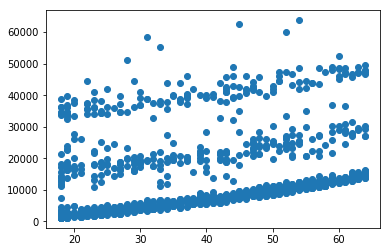

In [5]:
plt.scatter(x=df.age, y=df.charges)

In [6]:
df.charges.describe()

count     1338.000000
mean     13270.422265
std      12110.011237
min       1121.873900
25%       4740.287150
50%       9382.033000
75%      16639.912515
max      63770.428010
Name: charges, dtype: float64

In [7]:
#chose to make big charge more than 40000 because 
#mean is 13000 and 2 std away is 37000 I then rounded up
df['big_charge'] = (df['charges'] > 40000).astype(int)
df = df.drop('charges', axis = 1)
df = pd.get_dummies(df)
# dropped sex_female and smoker no because its the inverse of sex_male and smoker_yes
df = df.drop(['sex_female', 'smoker_no'], axis = 1)

In [8]:
df.shape

(1338, 10)

In [9]:
from sklearn.model_selection import train_test_split
df_train, df_test = train_test_split(df, test_size=0.2, random_state = 12)
X_train = df_train.loc[:, ~(df_train.columns).isin(['big_charge'])]
Y_train = df_train['big_charge']
X_test = df_test.loc[:, ~(df_test.columns).isin(['big_charge'])]
Y_test = df_test['big_charge']

In [10]:
# using 4 models
logistic = LogisticRegression()
gbc = GradientBoostingClassifier()
rfc = RandomForestClassifier()
knn = KNeighborsClassifier()

In [11]:
def get_metrics(model, dataframe):
    x = dataframe.loc[:, ~(df_train.columns).isin(['big_charge'])]
    y = dataframe['big_charge']
    r2_scores = cross_val_score(model, x, y, cv=10)
    r2 = r2_scores.mean()
    accuracy_scores = cross_val_score(model,x,y, cv=10, scoring='accuracy')
    accuracy = accuracy_scores.mean()
    f1_scores = cross_val_score(model,x,y, cv=10, scoring='f1')
    f1 = f1_scores.mean()
    print(model)
    print('Accuracy:', accuracy)
    print('F1 Score:', f1)

In [12]:
logistic.fit(X_train, Y_train)
get_metrics(logistic, df_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
Accuracy: 0.956081134035
F1 Score: 0.386587301587


/Users/joshuarkarnad/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


In [13]:
gbc.fit(X_train,Y_train)
get_metrics(gbc, df_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)
Accuracy: 0.984067412502
F1 Score: 0.847074592075


In [14]:
rfc.fit(X_train, Y_train)
get_metrics(rfc, df_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)
Accuracy: 0.98223303095
F1 Score: 0.800909090909


In [15]:
knn.fit(X_train, Y_train)
get_metrics(knn, df_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')
Accuracy: 0.937414689421
F1 Score: 0.0285714285714


/Users/joshuarkarnad/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/joshuarkarnad/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/joshuarkarnad/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/joshuarkarnad/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


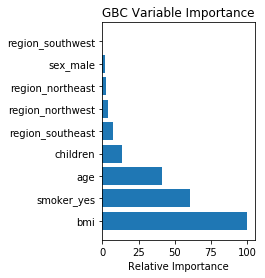

In [16]:
feature_importance = gbc.feature_importances_
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)[::-1]
pos = np.arange(sorted_idx.shape[0]) + .5
plt.subplot(1, 2, 2)
plt.barh(pos[0:10], feature_importance[sorted_idx[0:10]], align='center')
plt.yticks(pos[0:10], X_train.columns[sorted_idx[0:10]])
plt.xlabel('Relative Importance')
plt.title('GBC Variable Importance')
plt.show()

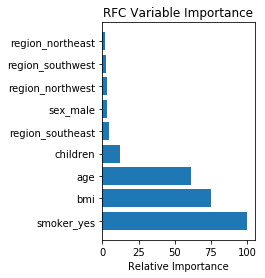

In [17]:
feature_importance = rfc.feature_importances_
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)[::-1]
pos = np.arange(sorted_idx.shape[0]) + .5
plt.subplot(1, 2, 2)
plt.barh(pos[0:10], feature_importance[sorted_idx[0:10]], align='center')
plt.yticks(pos[0:10], X_train.columns[sorted_idx[0:10]])
plt.xlabel('Relative Importance')
plt.title('RFC Variable Importance')
plt.show()

BMI and Smoking are the two most important variables in predicting whether a customer will have a big charge.

In [18]:
def test_metrics(model, x, y):
    y_pred = model.predict(x)
    accuracy = accuracy_score(y, y_pred)
    macro = f1_score(y, y_pred, average='macro')
    micro = f1_score(y, y_pred, average='micro')
    weighted = f1_score(y, y_pred, average='weighted')
    print(model)
    print('Accuracy:', accuracy)
    print('F1 Macro:', macro)
    print('F1 Micro:', micro)
    print('F1 Weighted:', weighted)

In [19]:
# Chose GBC and will run on test set due to highest f1 and accuracy scores

test_metrics(gbc, X_test, Y_test)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)
Accuracy: 0.973880597015
F1 Macro: 0.853150684932
F1 Micro: 0.973880597015
F1 Weighted: 0.970402780617
